# 시험장 환경 정보

Python: 3.7.4 (tags/v3.7.4:e09359112e, Jul  8 2019, 20:34:20) [MSC v.1916 64 bit (AMD64)]

|모듈|버젼|
|----|----|
|pandas|0.25.1|
|numpy|1.18.5|
|sklearn|0.21.3|
|scipy|1.5.2|
|mlxtend|0.15.0.0|
|statsmodels|0.11.1|

In [1]:
# 실행 환경 확인

import pandas as pd
import numpy as np
import sklearn
import scipy
import statsmodels
import mlxtend
import sys

print(sys.version)
for i in [pd, np, sklearn, scipy, mlxtend, statsmodels]:
    print(i.__name__, i.__version__)

3.7.4 (tags/v3.7.4:e09359112e, Jul  8 2019, 20:34:20) [MSC v.1916 64 bit (AMD64)]
pandas 0.25.1
numpy 1.18.5
sklearn 0.21.3
scipy 1.5.2
mlxtend 0.15.0.0
statsmodels 0.11.1


# 문제 개요

다음은 폴더블 폰의 힌지에 들어가는 스프링 내구력을 테스트한 실험 결과이다. 

스프링 측정값과 스프링에 가한 부하 정보와 함께, 테스트 통과/실패 (failure) 결과가 기재되어 있다. 

개발부서는 테스트 비용을 줄이기 위해 failure 여부를 맞추는 모델을 만들고자 한다.

변수명은 보안을 위해 measurement_0과 같이 익명화되었다.

데이터 구성

학습데이터: train_prob.csv, 21,458 rows, 25 columns

테스트데이터: test_prob.csv, 5,112 rows, 24 columns, 

테스트정답셋: test_prob_ans.csv, 5,112 rows, 1 columns


컬럼명	설명	타입

|Id|실험 고유 번호|정수형|
|--|--------------|------|
|product_code|스프링 코드|범주형|
|loading|스프링에 가한 부하|실수형|
|attribute_0|구성 소재1|범주형|
|attribute_1|구성 소재2|범주형|
|attribute_2|구성 소재3|정수형|
|attribute_3|구성 소재4|정수형|
|measurement_0 ~ 17|측정값 0~17|실수형|
|failure|성공여부|이진형(0, 1)|


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df_train = pd.read_csv('train_prob.csv', index_col='id')
df_train.head()

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
id,,,,,,,,,,,,,,,,,,,,,
0,A,80.10,material_7,material_8,9,5,7,8,4,18.040,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,A,84.89,material_7,material_8,9,5,14,3,3,18.213,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,A,82.43,material_7,material_8,9,5,12,1,5,18.057,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,A,101.07,material_7,material_8,9,5,13,2,6,17.295,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,A,188.06,material_7,material_8,9,5,9,2,8,19.346,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21458 entries, 0 to 26569
Data columns (total 25 columns):
product_code      21458 non-null object
loading           21257 non-null float64
attribute_0       21458 non-null object
attribute_1       21458 non-null object
attribute_2       21458 non-null int64
attribute_3       21458 non-null int64
measurement_0     21458 non-null int64
measurement_1     21458 non-null int64
measurement_2     21458 non-null int64
measurement_3     21146 non-null float64
measurement_4     21016 non-null float64
measurement_5     20893 non-null float64
measurement_6     20818 non-null float64
measurement_7     20692 non-null float64
measurement_8     20605 non-null float64
measurement_9     20469 non-null float64
measurement_10    20399 non-null float64
measurement_11    20278 non-null float64
measurement_12    20171 non-null float64
measurement_13    20063 non-null float64
measurement_14    19976 non-null float64
measurement_15    19855 non-null float64
me

In [9]:
df_train.select_dtypes('number').describe().T

,count,mean,std,min,25%,50%,75%,max
loading,21257.0,127.680897,38.987953,33.160,100.01000,122.2500,148.77000,385.860
attribute_2,21458.0,6.933684,1.585791,5.000,5.00000,6.0000,8.00000,9.000
attribute_3,21458.0,7.535977,1.474057,5.000,8.00000,8.0000,8.00000,9.000
measurement_0,21458.0,7.311912,4.261533,0.000,4.00000,7.0000,10.00000,29.000
measurement_1,21458.0,7.861264,4.152362,0.000,5.00000,8.0000,10.00000,28.000
measurement_2,21458.0,6.016917,3.299464,0.000,4.00000,6.0000,8.00000,24.000
measurement_3,21146.0,17.795325,1.002861,13.968,17.11825,17.7910,18.47300,21.499
measurement_4,21016.0,11.736571,0.997623,8.008,11.05400,11.7370,12.41800,16.484
measurement_5,20893.0,17.130985,0.996501,12.073,16.44700,17.1360,17.80800,21.425
measurement_6,20818.0,17.507452,0.995234,13.566,16.83600,17.5150,18.18075,21.543


In [12]:
df_train.select_dtypes('object').apply(lambda x: x.value_counts()).unstack().dropna()

product_code  A              5100.0
              B              5250.0
              C              5765.0
              E              5343.0
attribute_0   material_5     5250.0
              material_7    16208.0
attribute_1   material_5     5250.0
              material_6     5343.0
              material_8    10865.0
dtype: float64

# 전처리(Preprocessing)

train_prob.csv를 불러 온다. 이를 basetable이리고 한다.

In [7]:
df_basetable = df_train.copy()

# 단계 1

basetable에 measurement_3 ~17 각각의 행이 결측 여부인지를 나타내는 파생 변수를 만든다. 

파생 변수는 이진 형식이고, False는 미결측 True는 결측을 의미한다. 

파생 변수의 이름은 measurement 번호에 따라 isna_3 ~ 17로 한다. 

In [20]:
cols = ['measurement_{}'.format(i) for i in range(3, 18)]
na_cols = ['isna_{}'.format(i) for i in range(3, 18)]
df_basetable[na_cols] = df_basetable[cols].isna()
df_basetable[na_cols].sum()

isna_3      312
isna_4      442
isna_5      565
isna_6      640
isna_7      766
isna_8      853
isna_9      989
isna_10    1059
isna_11    1180
isna_12    1287
isna_13    1395
isna_14    1482
isna_15    1603
isna_16    1708
isna_17    1818
dtype: int64

## 단계 2

이 과제를 맡은 데이터분석가 지희는 measurement_3~17의 결측치 처리 방안을 고민하던 중, 

개발부서에서 measurement_17은 product_code별로 failure를 예측하기 위해 

measurement_3 ~ measurement_9을 다음과 같이 선형 조합하여 생성한 값이라는 정보를 받았다. 

$measurement_{17}=\beta_{3}measurement_{3}+\beta_{4}measurement_{4}+...+\beta_{17}measurement_{9}$

이는 즉,

$measurement_{3}=\beta'_{4}measurement_{4}+\beta'_{5}measurement_{5}+...+\beta'_{17}measurement_{17}$

...

$measurement_{9}=\beta''_{3}measurement_{3}+\beta''_{4}measurement_{4}+...+\beta''_{17}measurement_{17}$

와 같이 measurement_3 ~ measurement_9의 각 변수들도 measurement_17과 나머지 변수들의 선형 조합으로 표현 할 수 있음을 의미 한다. 

이러한 변수간에 선형적 관계를 이용하여 대상 변수를 번갈아 가면서 예측 모델을 만들어 최대한 원래 값에 가깝게 복원할 수 있다. 

이러한 반복적인 결측치 복원 방법을 사내 데이터분석 연구소에 문의 했더니 다음과 같은 가이드를 주었다. 

sklearn 모듈에 아직은 실험 단계이지만, 비슷한 경우에 문제 없이 사용했던 사례가 있어 의견을 드립니다. 

가이드의 내용을 참조하여 basetable의 measurement_3~9와 measurement_17 결측치를 복원하라.

Hint] sklearn.experimental.enable_iterative_imputer

Hint] sklearn.impute.IterativeImputer, random_state=123

Hint] sklearn.linear_model.LinearRegression

입력 변수] measurement_3 ~ 9, measurement_17 (입력 변수 순서에 유의)

요건과 관련이 없고, 설정값을 제시하지 않은 매개 변수는 기본값을 사용한다.


In [26]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

X_imp = ['measurement_{}'.format(i) for i in range(3, 10)] + ['measurement_17']
imp_iter = IterativeImputer(
    estimator=LinearRegression(), # 선형 모델 사용
    random_state=123
)

array([[ 18.04      ,  12.518     ,  15.748     , ...,  20.155     ,
         10.672     , 764.1       ],
       [ 18.213     ,  11.54      ,  17.717     , ...,  17.889     ,
         12.448     , 682.057     ],
       [ 18.057     ,  11.652     ,  16.738     , ...,  18.288     ,
         12.715     , 663.376     ],
       ...,
       [ 15.67      ,  11.535     ,  16.778     , ...,  19.279     ,
         11.407     , 750.364     ],
       [ 18.059     ,  11.75609142,  16.918     , ...,  19.358     ,
         11.392     , 730.156     ],
       [ 18.034     ,  11.431     ,  16.918     , ...,  18.731     ,
         10.611     , 602.354     ]])

In [31]:
df_basetable_bak = df_basetable.copy() # 실습용: 데이터프레임 백업

In [32]:
# 방법1: groupby
df_basetable = df_basetable_bak.copy() # 실습용: 데이터프레임 백업
df_basetable[X_imp] = df_basetable.groupby('product_code').apply(
    lambda x: pd.DataFrame(imp_iter.fit_transform(x[X_imp]), index=x.index, columns=X_imp)
) # Apply에서 반환시 DataFrame 형태로 입력과 동일한 폼으로 반환

In [38]:
# 방법2: 반복문
df_basetable = df_basetable_bak.copy() # 실습용: 데이터프레임 백업
for i in df_basetable['product_code'].unique(): # product_code 각각의 범주에 대한 반복
    s_tmp = df_basetable['product_code'] == i # 현재 처리하는 product_code에 대한 boolean Index 
    df_basetable.loc[s_tmp, X_imp] = imp_iter.fit_transform(df_basetable.loc[s_tmp, X_imp])

## 단계 3

measurement_10~16까지의 결측치는 모두 product_code별 평균으로 대치한다.

Hint] 전처리 단계에서 보간 결과를 확인해 보기 위한 각 변수의 평균과 분산.

열의 이름의 숫자는 measurement_ 번호, 값은 소수점 3째 자리까지 반올림


In [43]:
mean_cols = ['measurement_{}'.format(i) for i in range(10, 17)]
df_basetable[mean_cols] = df_basetable.groupby('product_code')[mean_cols]\
            .transform(lambda x: x.fillna(x.mean())) # 동일한 형태로 반환이 되고 다른 Series의 사용이 필요없으니, transform

In [47]:
# 결과 확인용
df_basetable[['measurement_{}'.format(i) for i in range(3, 18)]].agg(['mean', 'std'])\
            .rename(columns=lambda x: x.split('_')[1])\
            .applymap(lambda x: round(x, 3))

,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
mean,17.796,11.736,17.131,17.506,11.719,19.022,11.434,16.034,19.194,11.734,15.666,16.033,15.051,16.398,701.768
std,0.997,0.994,0.994,0.992,0.993,1.005,0.997,1.278,1.579,1.433,1.149,1.461,1.478,1.671,119.180


# 문제1

(basetable을 사용) measurement_3~16까지 결측 여부가 failure에 영향이 있는지를 파악하고, 

failure를 분류하는 데 도움이 될 만한 것은 예측 모델의 입력 변수로 사용하고자 한다. 

이를 위해 전처리 과정에서 뽑아낸 isna_3~16을 활용한다.

n이 3부터 16까지, 다음의 검정을 수행한다. 

$H_0: P(failure=True|measurement_{n}=Missing)=P(failure=True)$

$H_1: P(failure=True|measurement_{n}=Missing) \neq P(failure=True)$

모집단의 P(failure=True) = 0.2114


In [48]:
P_true = 0.2114

## 단계 1-1

우선, measurement_3으로 위 검정을 시행해보자.

$H_0: P(failure=True|isna_{n}=True)=P(failure=True)$

$H_1: P(failure=True|isna_{n}=True) \neq P(failure=True)$

으로 바꿀 수 있다.

P(failure=True|isna_{n}=True)은 표본수가 충분하여 중심극한정리에 의해 정규분포를 따르는 것은 분석가 간에 이견이 없다고 한다. 

위 검정의 p-value를 구하여 보고 힌트에 주어진 p-value와 비교하여 검정 방법에 문제가 없음을 확인하라.

 Hint: scipy.stats.norm 모듈을 활용

 Hint: p-value는 0.0037(소수점 다섯째 자리에서 반올림하여 넷째 자리까지 표시)


In [55]:
# 방법 1
from scipy.stats import norm
P_var = P_true * (1 - P_true)
n_sample = df_basetable['isna_3'].sum()
P_missing_true = df_basetable.loc[df_basetable['isna_3'], 'failure'].mean()
P_missing_var = P_var / n_sample
P_missing_std = P_missing_var ** 0.5
P_var, n_sample, P_missing_var

norm.cdf(P_missing_true, loc=P_true, scale=P_missing_std) * 2, norm.cdf(-abs((P_missing_true - P_true) / P_missing_std)) * 2

(0.0036630709140241546, 0.0036630709140241546)

In [58]:
# 방법 2
from statsmodels.stats.proportion import proportions_ztest

proportions_ztest(
    df_basetable.loc[df_basetable['isna_3'], 'failure'].sum(),
    n_sample,
    P_true,
    'two-sided',
    P_true
)

(-2.905807189028007, 0.0036630709140241546)

## 단계 1-2

measuremenet_3을 포함하여 measurement_4 ~ 16까지 위 검정을 반복하고 

귀무가설을 기각할 수 있는 경우의 p-value의 합을 A라고 한다. (유의 수준은 5%로 한다.)

In [61]:
sel_na_cols = []
A = 0
for i in range(3, 17):
    col = 'isna_{}'.format(i)
    n_sample = df_basetable[col].sum()
    P_missing_true = df_basetable.loc[df_basetable[col], 'failure'].mean()
    P_missing_var = P_var / n_sample
    P_missing_std = P_missing_var ** 0.5
    pvalue = norm.cdf(-abs((P_missing_true - P_true) / P_missing_std)) * 2
    print(col, pvalue , 'o' if pvalue < 0.05 else 'x')
    if pvalue < 0.05:
        sel_na_cols.append(col)
        A += pvalue
sel_na_cols, A

isna_3 0.0036630709140241546 o
isna_4 0.17803686833140808 x
isna_5 0.026325008335499278 o
isna_6 0.793491357072205 x
isna_7 0.37298091572329806 x
isna_8 0.48514534123655306 x
isna_9 0.589649524697301 x
isna_10 0.44594047726157915 x
isna_11 0.9175464043670771 x
isna_12 0.5421744277936988 x
isna_13 0.6507952588133231 x
isna_14 0.49582912857498873 x
isna_15 0.9938599942603648 x
isna_16 0.6324265724265041 x


(['isna_3', 'isna_5'], 0.029988079249523434)

## 단계 1-3

검정 결과 귀무가설을 기각할 수 있는 경우는 총 두 건이다. 

해당 파생 변수를 measurement의 번호 순으로 na_1, na_2로 변경하여 prob1 데이터셋을 생성하라.

In [62]:
df_prob1 = df_basetable.assign(
    na_1 = lambda x: x['isna_3'],
    na_2 = lambda x: x['isna_5']
)
df_prob1.head()

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,isna_10,isna_11,isna_12,isna_13,isna_14,isna_15,isna_16,isna_17,na_1,na_2
id,,,,,,,,,,,,,,,,,,,,,
0,A,80.10,material_7,material_8,9,5,7,8,4,18.040,...,False,False,False,False,True,False,False,False,False,False
1,A,84.89,material_7,material_8,9,5,14,3,3,18.213,...,False,False,False,False,False,False,False,False,False,False
2,A,82.43,material_7,material_8,9,5,12,1,5,18.057,...,False,True,False,False,False,False,False,False,False,False
3,A,101.07,material_7,material_8,9,5,13,2,6,17.295,...,False,False,False,False,False,False,False,False,False,False
4,A,188.06,material_7,material_8,9,5,9,2,8,19.346,...,False,False,False,False,False,False,False,False,False,False


A의 값을 소수점 넷째 자리에서 반올림하여 셋째 자리까지 출력하시오. 

**0.030**

# 문제2

첫째는 스프링 개발 업체들은 실험이 제품 별로 공정하게 진행이 됐는지를 의문을 가지고 있다.

product_code에 따라 개발 업체가 다르다. 

product_code에 대해서 스프링에 가한 부하(loading)를 동일하게 했는지 조사하라.

둘째는, attribute_0와 attribute_1은 스프링을 구성하는 주요 소재이다. 

failure와는 관계가 없음이 이전에 검증되었다. 

하지만, 이에 대한 재확인 요청을 받아 attribute_0와 attribute_1은 failure와 상관없음을 확인한다.

이를 위해 다음 단계를 수행하라.


## 단계 2-1

prob1에서 입력 변수 loading에 결측이 없는 행들을 뽑아 prob2 데이터프레임을 만든다.

Hint] prob2의 데이터 수는 21,257 이다.


In [65]:
df_prob2 = df_prob1.loc[df_prob1['loading'].notna()].copy()
df_prob2.shape

(21257, 43)

## 단계 2-2

prob_2에 loading의 각 행들에 자연 로그 함수를 적용하여 파생 변수 loading_log를 만든다.

Hint] np.log


In [68]:
df_prob2['loading_log'] = np.log(df_prob2['loading'])

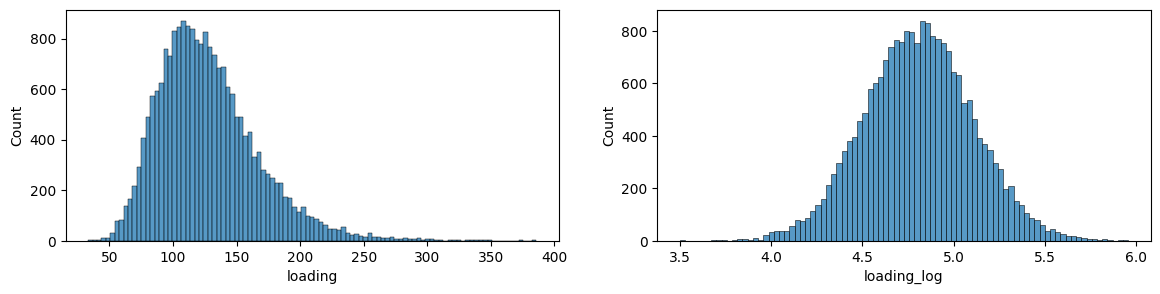

In [69]:
# 로그 변환이 어떤 효과를 보였는지, 보여주기 위한 참고용 코드입니다.
# 좌측으로 치우친 loading 변수가 log 변환을 통해 좌우 대칭형으로 변환되었음을 확인할 수 있습니다.

fig, axes = plt.subplots(1, 2, figsize=(14, 3) )
sns.histplot(data=df_prob2, x='loading', ax=axes[0])
sns.histplot(data=df_prob2, x='loading_log', ax=axes[1])
plt.show()

In [70]:
# 정규 분포와 얼마나 가까워졌는지 확인해보자.
from scipy.stats import kstest
from scipy.stats import norm, zscore
kstest(zscore(df_prob2['loading']), norm.cdf), kstest(zscore(df_prob2['loading_log']), norm.cdf)

(KstestResult(statistic=0.0600599455247498, pvalue=4.255982724723072e-67),
 KstestResult(statistic=0.0042631101250387715, pvalue=0.832889492249071))

## 단계 2-3

loading_log가 product_code에 대해 정규성을 지니고 있는지 확인하고자 한다.

이를 위해 Jarque-Bera로 검정하고 결과의 p-value가 0.05가 넘는 product_code의 수를 B라고 하자.

Hint] scipy.stats.jarque_bera


In [78]:
from scipy.stats import jarque_bera
df_prob2.groupby('product_code')['loading_log']\
        .apply(lambda x: pd.Series(jarque_bera(x), index=['stat', 'pvalue']))\
        .unstack()\
        .query('pvalue > 0.05')

,stat,pvalue
product_code,,
A,1.467731,0.480050
B,0.616884,0.734591
E,0.048395,0.976093


In [79]:
B = 3

## 단계 2-4

loading_log 변수를 product_code로 구분했을 때, 

등분산성을 보이는지, Bartlett 검정을 수행하라. 

검정 결과에서 p-value를 C라고 한다.

Hint] scipy.stats.bartlett


In [80]:
from scipy.stats import bartlett
bartlett?

In [88]:
result_bar = bartlett(*df_prob2.groupby('product_code')['loading_log'].agg(list).tolist())
C = result_bar.pvalue
result_bar, C

(BartlettResult(statistic=1.928667047072185, pvalue=0.5873433093297675),
 0.5873433093297675)

In [87]:
#df_prob2['product_code'].unique()
bartlett(
    df_prob2.loc[df_prob2['product_code'] == 'A', 'loading_log'],
    df_prob2.loc[df_prob2['product_code'] == 'B', 'loading_log'],
    df_prob2.loc[df_prob2['product_code'] == 'C', 'loading_log'],
    df_prob2.loc[df_prob2['product_code'] == 'E', 'loading_log']
)

BartlettResult(statistic=1.928667047072185, pvalue=0.5873433093297675)

## 단계 2-5

product_code에 대한 분산분석(ANOVA)을 통해서 loading_log 평균에 차이가 있는지 검정한다.

그 결과 중 p-value를 D라고 한다.

Hint] scipy.stats.f_oneway


In [91]:
from scipy.stats import f_oneway
result_an = f_oneway(*df_prob2.groupby('product_code')['loading_log'].agg(list).tolist())
D = result_an.pvalue
result_an, D

(F_onewayResult(statistic=0.37177284134760413, pvalue=0.7733782072320899),
 0.7733782072320899)

## 단계 2-6

Chi-square 동질성 검정을 통해 attribute_0, attribute_1의 조합이 failure와 연관이 있는지 조사하라. 

(유의 수준 1%) 연관이 있다면 E값은 1 없으면 0으로 한다.

 Hint] scipy.stats.chi2_contingency, correction=False


In [93]:
df_prob2[['attribute_0', 'attribute_1']].apply(lambda x: x.str.cat(), axis=1)

id
0        material_7material_8
1        material_7material_8
2        material_7material_8
3        material_7material_8
4        material_7material_8
                 ...         
26565    material_7material_6
26566    material_7material_6
26567    material_7material_6
26568    material_7material_6
26569    material_7material_6
Length: 21257, dtype: object

In [100]:
from scipy.stats import chi2_contingency
result_chi2 = chi2_contingency(
     pd.crosstab(index=df_prob2[['attribute_0', 'attribute_1']].apply(lambda x: x.str.cat(), axis=1), 
                 columns=df_prob2['failure']),
     correction=False
)
E = 1 if result_chi2[1] < 0.01 else 0
result_chi2, E

((7.0400463075335615,
  0.029598749837407304,
  2,
  array([[4106.03584702, 1102.96415298],
         [4162.79042198, 1118.20957802],
         [8487.17373101, 2279.82626899]])),
 0)

In [101]:
B + C + D + E

4.360721516561858

B + C + D + E의 값을 소수점 셋째 자리에서 반올림하여 둘째 자리까지 출력하시오.

**4.36**

# 문제3

로지스틱 회귀모델로 수치형 변수measurement_0 ~ 17, 

loading과 이진형인 na_1, na_2 중에서 최적의 성능을 보이는 입력 변수들을 찾고자 한다.


## 단계 3-1

prob1을 복사하여 prob3을 만든다. loading의 결측치는 loading의 평균으로 대치한다.  

## 단계 3-2: 
    
prob3를 80%는 학습데이터 prob3_train으로 20%는 테스트데이터 prob3_test로 나눈다. 

prob3_train의 failure가 1인 비율과 prob3_test의 failure가 1의 비율을 동일하게 한다.


요건: sklearn.model_selection.train_test_split, random_state=123, 
      train과 test의 failure의 비율은 stratify 매개 변수를 이용하여 맞춘다.


## 단계 3-3

prob3_train의 수치형 입력 변수 loading, measurement_0 ~ 17을 표준화한다. 

prob3_train의 표준화 설정으로 prob3_test의 loading, measurement_0 ~ 17에도 적용한다. 

표준화 처리한 prob3_train과 prob3_test는 문제4와 문제 5에서 사용한다.

Hint] sklearn.preprocessing.StandardScaler


## 단계 3-4
    
로지스틱 회귀모델을 사용하여 loading, measurement_0~17과 na_1, na_2를 입력 변수로 하여 prob3_train을 학습한다. 

로지스틱 회귀모델을 prob3_test로 성능을 측정한 값을 A라고 한다.

입력 변수: loading, measurement_0~17, na_1, na_2

대상 변수: failure

성능 지표: AUC(area under of ROC curve)

Hint] sklearn.linear_model.LogisticRegression, solver='lbfgs'

Hint] sklearn.metrics.roc_auc_score


## 단계 3-5

loading, measurement_0 ~ 17, na_1, na_2를 후보 입력 변수로 한다. 

전진 선택법을 사용하여 이 후보 입력 변수 중에서 최적의 성능을 보이는 입력 변수의 조합을 찾는다. 

전진 선택법의 선택 기준은 prob3_train을 대상으로 5겹 층화교차검증(5-Fold stratified cross validation)을 하고 

겹외(OOF, Out-Of Fold) 성능의 평균값으로 한다. 전진 선택 과정에서 선택했던 변수를 제외하지 않는다. 

입력 변수: 본 단계 요건 참고

대상 변수: failure 

성능 지표: AUC(area under of ROC curve)

Hint] mlxtend.feature_selection.SequentialFeatureSelector

sklearn.linear_model.LogisticRegression, solver='lbfgs'

sklearn.metrics.roc_auc_score

sklearn.model_selection.StratifiedKFold, random_state=123, shuffle=True


## 단계 3-6

단계 3-5에서 찾은 최적의 입력 변수 조합으로 로지스틱 회귀모델을 사용하여 prob3_train을 학습하고 

prob3_test로 성능을 측정한 값을 B라고 한다.

입력 변수: 3-5단계에서 도출한 최적의 입력 변수 조합

대상 변수: failure

성능 지표: AUC(area under of ROC curve)

Hint] sklearn.linear_model.LogisticRegression, solver='lbfgs'

Hint] sklearn.metrics.roc_auc_score


A-B값을 소수점 넷째 자리에서 반올림하여 셋째 자리까지 출력하시오

Ex) 1.135

# 문제 4

차원 축소 기법을 통한 데이터의 특성과 failure 분류 성능을 높힐 만한 요소를 살펴 본다. 

첫째로, loading을 제외하고, measurement_0 ~ 17을 입력으로 failure를 대상 변수로 LinearDiscrimantAnalysis(LDA) 모델을 만든다. 

범주가 두 개인 failure를 분류한다는 점에서 LDA 모델은 measurement_0 ~ 17를 한 개의 경계점으로 

failure를 최대한 정확하게 구분하도록 하나의 연속형 변수로 변환한다. 

LDA 변환값과 실험에서 스프링에 가한 부하(loading)와 상관도를 측정하여, 

이 측정 결과가 얼마나 실험에 반영되었는지 파악한다.

둘째로, PCA를 사용하여 차원 감소로 failure 분류 성능에 얼마나 효과가 있을지 살펴본다.

문제3에서 사용했던, 전처리(loading 결측치와 표준화 과정을 거친) 과정을 거친 prob3_train과 prob3_test를 사용한다.


## 단계 4-1

prob3_train에서 measurement_0 ~ 17을 입력으로 failure를 대상 변수로 하여 LDA(Linear Discriminant Analysis) 모델을 학습한다. 

measurement_0 ~ 17에 대한 LDA의 변환값과 loading과 스피어만 상관도 (spearman correlation)의 p-value를 구하여 A라고 한다.

입력 변수] measurement_0 ~ 17 (순서에 유의 하시오)

대상 변수] failure

Hint] sklearn.discriminant_analysis.LinearDiscriminantAnalysis

Hint] scipy.stats.spearmanr


## 단계 4-2

prob3_train에서 measurement_0 ~ 17을 대상으로 주성분분석(Principal Component Analysis, PCA) 모델을 학습한다. 

분산 설명율이 높은 순으로 주성분을 변수명을 pca_0 ~ 17한 파생 변수를 prob3_train에 추가하여 prob4_train을 만든다. 

prob3_test에 prob3_train를 학습했던 PCA 모델로 동일한 방법으로 pca0 ~17 파생 변수를 추가하여 prob4_test를 만든다.

입력 변수] measurement_0 ~ 17 (순서에 유의 하시오)

Hint] sklearn.decomposition.PCA


## 단계 4-3

초기에 loading을 입력 변수로 하여 prob4_train을 학습하고, prob4_test에 대한 성능을 측정한다.

여기에 pca_0에서 pca_17까지 입력 변수를 하나씩 추가 하면서, 

즉 분산 설명율이 높은 순으로 컴포넌트를 하나씩 추가해가면서 prob4_test의 성능을 측정 했을 때, 

최적의 성능을 보인 컴포넌트들의 분산 설명율의 합을 B라고 한다. (만일 없다면 B = 0이다.)

입력 변수: 설명 참고

대상 변수: failure

성능 지표: AUC(area under of ROC curve)

Hint] sklearn.linear_model.LogisticRegression, solver=’lbfgs’


A + B를 소수점 셋째 자리에서 반올림하여 둘째 자리까지 구하라.

Ex) 12.34

# 문제 5

랜덤포레스트 분류기(Random-Forest Classifier)의 최적의 하이퍼 파라미터(Hyper-Parameter, 초매개변수)를 탐색하고자 한다.

문제3에서 사용했던, 전처리(loading 결측치와 표준화 과정을 거친) 과정을 거친 prob3_train과 prob3_test를 사용한다.

## 단계 5-1

sklearn에서 제공하는 랜덤포레스트 분류기(Random-Forest Classifier)의 하이퍼 파라미터 중 

n_estimators, max_depth 그리고 min_samples_split의 최적 조합을 탐색한다. 

탐색 값은 아래에 제공한 하이퍼 파라미터의 모든 조합이다. 

prob3_train을 대상으로 5-겹 층화교차검증(5-fold stratified cross validation)으로 

겹외(OOF set, Out-Of-Fold set) 성능의 평균을 기준으로 하이퍼 파라미터를 선택한다.

  - n_estimators: [5, 10, 15]

  - max_depth: [5, 6, 7]
  
  - min_samples_split: [256, 512]

Hint] 모든 하이퍼 파라미터의 조합의 수는 18개이다

입력 변수: loading, measurement_0 ~ 17, na_1, na_2 (순서에 유의)

대상 변수: failure

성능 지표: AUC (area under of ROC curve)

Hint] sklearn.ensemble.RandomForestClassifier, random_state=123 

Hint] itertools.product 필요시 사용

Hint] sklearn.model_selection.cross_val_score 필요시 사용

Hint] sklearn.model_selection.StratifiedKFold, random_state=123, shuffle=True

Hint] sklearn.model_selection.GridSearchCV 필요시 사용

## 단계5-2

단계 5-1에서 구한 최적 하이퍼 파라미터로 설정한 랜덤포레스트 분류기(Random-Forest Classifier)를 사용하여 prob3_train 학습하고, 

prob3_test로 성능을 측정하여 이 값을 A라고 한다.

입력 변수: loading, measurement_0 ~ 17, na_1, na_2 (순서에 유의)

대상 변수: failure

성능 지표: AUC (area under of ROC curve)

Hint] sklearn.ensemble.RandomForestClassifier, random_state=123 


A값을 소수점 넷째 자리에서 반올림하여 3째 자리까지 출력하시오.

Ex) 0.123